# Graduate Admission Dataset Overview

This dataset contains information about applicants to a graduate business program, including demographic, academic, and professional background variables.
The main objective is to predict whether an applicant receives an **admission offer** based on their qualifications and experience.

---

## Dataset Overview & Features

Each record represents one applicant and includes data such as GPA, GMAT scores, major, work experience, and industry.
This dataset can be used for admission analytics, selection prediction models, and educational data mining.

### Features

| Feature            | Description                                                                                              |
| ------------------ | -------------------------------------------------------------------------------------------------------- |
| **application_id** | Unique identifier for each application.                                                                  |
| **gender**         | Applicant's gender (Male/Female).                                                                        |
| **international**  | Indicates whether the applicant is an international student (`True`/`False`).                            |
| **gpa**            | Grade Point Average of the applicant.                                                                    |
| **major**          | Applicant’s undergraduate major (e.g., Business, STEM, Humanities).                                      |
| **race**           | Racial background of the applicant.                                                                      |
| **gmat**           | GMAT score of the applicant (numeric).                                                                   |
| **work_exp**       | Years of professional work experience.                                                                   |
| **work_industry**  | Industry in which the applicant has professional experience (e.g., Technology, Consulting, Health Care). |

---

## Target Variable

| Target        | Description                                                             |
| ------------- | ----------------------------------------------------------------------- |
| **admission** | Admission decision outcome (`Admit` or `NaN` for not admitted/pending). |

This target variable indicates whether the applicant received an admission offer based on their profile.


## Goal

The goal of this dataset is to model and analyze the factors influencing **graduate admission decisions**.
Predictive models can help admission committees identify key patterns in academic performance, test scores, and professional background.

---

## Applications

* Predictive modeling for admission decisions
* Educational analytics and student profiling
* Data-driven improvements in graduate recruitment
* Fairness and diversity analysis in admissions

---


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Libraries Imported

## Data Loading and Structure

In [52]:
url = 'MBA.csv'
df = pd.read_csv(url)
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


## Reseting Index To Application ID

In [53]:
df = df.set_index('application_id', drop=True).sort_index()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6194 entries, 1 to 6194
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         6194 non-null   object 
 1   international  6194 non-null   bool   
 2   gpa            6194 non-null   float64
 3   major          6194 non-null   object 
 4   race           4352 non-null   object 
 5   gmat           6194 non-null   float64
 6   work_exp       6194 non-null   float64
 7   work_industry  6194 non-null   object 
 8   admission      1000 non-null   object 
dtypes: bool(1), float64(3), object(5)
memory usage: 441.6+ KB


In [55]:
df.isna().sum()

gender              0
international       0
gpa                 0
major               0
race             1842
gmat                0
work_exp            0
work_industry       0
admission        5194
dtype: int64

## Missing Values Discovered

In [56]:
df['race'].value_counts()

race
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64

In [57]:
df['race'] = df['race'].fillna('White')

## Filing missing values for race with majority value found in column

In [58]:
df.isna().sum()

gender              0
international       0
gpa                 0
major               0
race                0
gmat                0
work_exp            0
work_industry       0
admission        5194
dtype: int64

In [59]:
df = df.dropna(subset=['admission']).reset_index(drop=True)

## Dropping missing target values and reseting index

In [60]:
df.isna().sum()

gender           0
international    0
gpa              0
major            0
race             0
gmat             0
work_exp         0
work_industry    0
admission        0
dtype: int64

In [61]:
df.shape

(1000, 9)

In [62]:
df.duplicated().sum()

np.int64(1)

## No duplicated values

In [63]:
df['admission'].unique()

array(['Admit', 'Waitlist'], dtype=object)

# Data Standardization

In [64]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['international'] = label_encoder.fit_transform(df['international'])
df['major'] = label_encoder.fit_transform(df['major'])
df['race'] = label_encoder.fit_transform(df['race'])
# df['admission'] = label_encoder.fit_transform(df['admission'])
df['work_industry'] = label_encoder.fit_transform(df['work_industry'])
df

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,0,1,3.30,0,4,710.0,5.0,13,Admit
2,0,0,2.93,2,3,590.0,3.0,13,Admit
3,0,0,3.24,1,2,640.0,6.0,10,Waitlist
4,0,0,3.03,2,4,600.0,5.0,13,Admit
...,...,...,...,...,...,...,...,...,...
995,0,0,3.31,0,1,690.0,3.0,9,Admit
996,0,0,3.21,2,4,680.0,5.0,1,Admit
997,0,0,3.38,1,2,680.0,3.0,13,Admit
998,1,0,3.35,1,2,750.0,5.0,10,Admit


In [66]:
custom_map = {'Waitlist': 0, 'Admit': 1}
df['admission_num'] = df['admission'].map(custom_map)
df

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission,admission_num
0,0,0,3.30,0,0,620.0,3.0,3,Admit,1
1,0,1,3.30,0,4,710.0,5.0,13,Admit,1
2,0,0,2.93,2,3,590.0,3.0,13,Admit,1
3,0,0,3.24,1,2,640.0,6.0,10,Waitlist,0
4,0,0,3.03,2,4,600.0,5.0,13,Admit,1
...,...,...,...,...,...,...,...,...,...,...
995,0,0,3.31,0,1,690.0,3.0,9,Admit,1
996,0,0,3.21,2,4,680.0,5.0,1,Admit,1
997,0,0,3.38,1,2,680.0,3.0,13,Admit,1
998,1,0,3.35,1,2,750.0,5.0,10,Admit,1


# Data Correlation

In [69]:
df.corr(numeric_only=True)

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission_num
gender,1.000000e+00,-1.385174e-16,0.212907,0.015597,-4.348026e-16,0.265062,-0.010946,-0.009185,3.150258e-17
international,-1.385174e-16,1.000000e+00,-0.059955,0.012770,5.195389e-01,-0.056913,-0.008975,-0.017620,5.776175e-03
gpa,2.129073e-01,-5.995464e-02,1.000000,-0.057054,-4.417291e-02,0.519611,0.010721,-0.023077,9.717470e-02
major,1.559710e-02,1.277048e-02,-0.057054,1.000000,1.428816e-02,-0.022179,-0.008102,0.037945,-6.152190e-02
race,-4.348026e-16,5.195389e-01,-0.044173,0.014288,1.000000e+00,-0.064283,-0.005235,-0.071435,1.428891e-02
gmat,2.650618e-01,-5.691320e-02,0.519611,-0.022179,-6.428271e-02,1.000000,-0.011873,-0.007755,1.406150e-01
work_exp,-1.094589e-02,-8.975130e-03,0.010721,-0.008102,-5.234825e-03,-0.011873,1.000000,-0.026521,4.079832e-02
work_industry,-9.184998e-03,-1.762010e-02,-0.023077,0.037945,-7.143525e-02,-0.007755,-0.026521,1.000000,5.142029e-02
admission_num,3.150258e-17,5.776175e-03,0.097175,-0.061522,1.428891e-02,0.140615,0.040798,0.051420,1.000000e+00


# Data Visualization

([0, 1], [Text(0, 0, 'Admit'), Text(1, 0, 'Waitlist')])

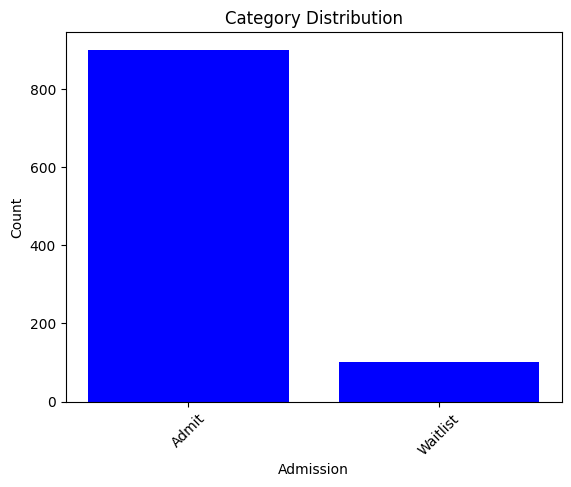

In [70]:
catgory_counts = df['admission'].value_counts()

plt.bar(catgory_counts.index, catgory_counts.values, color='blue')
plt.xlabel('Admission')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)

## Dataset Preparation

In [71]:
X = df.drop(['admission', 'admission_num'], axis=1)
y = df['admission']

### Splitting the Dataset
The dataset was divided into training and testing sets for model development and evaluation.

In [86]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=32)

# Decision Tree Model

In [87]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [88]:
drugTree.fit(X_trainset, y_trainset)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [89]:
tree_predictions = drugTree.predict(X_testset)

In [90]:
metrics.accuracy_score(y_testset, tree_predictions)

0.88

[Text(0.45689655172413796, 0.9, 'x[5] <= 655.0\nentropy = 0.457\nsamples = 800\nvalue = [723, 77]'),
 Text(0.1896551724137931, 0.7, 'x[5] <= 625.0\nentropy = 0.771\nsamples = 93\nvalue = [72, 21]'),
 Text(0.3232758620689655, 0.8, 'True  '),
 Text(0.06896551724137931, 0.5, 'x[7] <= 0.5\nentropy = 0.414\nsamples = 48\nvalue = [44, 4]'),
 Text(0.034482758620689655, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.10344827586206896, 0.3, 'x[7] <= 7.0\nentropy = 0.342\nsamples = 47\nvalue = [44.0, 3.0]'),
 Text(0.06896551724137931, 0.1, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.13793103448275862, 0.1, 'entropy = 0.491\nsamples = 28\nvalue = [25, 3]'),
 Text(0.3103448275862069, 0.5, 'x[1] <= 0.5\nentropy = 0.956\nsamples = 45\nvalue = [28, 17]'),
 Text(0.2413793103448276, 0.3, 'x[2] <= 3.14\nentropy = 0.934\nsamples = 20\nvalue = [7, 13]'),
 Text(0.20689655172413793, 0.1, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.27586206896551724, 0.1, 'entropy = 0.989

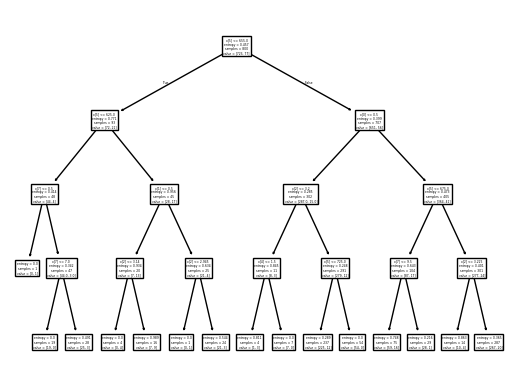

In [91]:
plot_tree(drugTree)